# Final Project （Group 36） #


### Introduction: Manreet  
### Methods – Exploratory - Shuokai Huang
### Methods – predictive - Bennett  
### Discussion - Xiany  

## 1. Introduction

    In the gaming industry, understanding how much time a player spends in a game can help developers design better user experiences and refine marketing strategies. These improvements can make more players subscribe to game-related newsletters, in hopes of doing well in the game. However, not all players choose to subscribe to the newsletter, but identifying the factors that influence these decisions can help improve certain areas that need more effort.

	To better understand certain behaviours, our project investigates the following: Can total hours played on the Minecraft server and age predict whether the player will subscribe to the game-related newsletter in the players.csv dataset? Additionally, we explore how this changes based on experience level, as we may find different engagement patterns in each experience level. 
    
	To address this question, we used the players.csv dataset, which contained detailed information about Minecraft server users. The dataset included variables such as age, gender, total hours played, experience level, and whether they have subscribed to the newsletter. By applying classification techniques, we aim to model and predict newsletter subscription behaviour based on the data provided. 
    
	This method will not only provide insights for any observable patterns of player engagement, but also demonstrate the importance of using classification models in predictive analysis, building on previous individual analysis that focused more on descriptive and exploratory approaches.


## 2. Importing and Tidying data 

In [2]:
library(tidyverse)
library(tidymodels)

url = "https://drive.google.com/uc?export=download&id=1gl3xMGBBIjHpG4kwIY-g84_ijx2sQYIa"
players <- read_csv(url)
dim(players); head(players)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.6     ✔ rsample      1.2.1
✔ dials        1.3.0     ✔ tune         1.1.2
✔ infer        1.0.7     ✔ workflows    1.1.4
✔ modeldata    1.4.0     ✔ workflowsets 1.0.1
✔ parsnip      1.2.1     ✔ yardstick    1.3.1
✔ recipes      1.1.0     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filt

[1] 196   7

experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21
Regular,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21
Amateur,TRUE,f58aad5996a435f16b0284a3b267f973f9af99e7a89bee0430055a44fa92f977,0.0,Adrian,Female,17


**First, we check whether there are any NAs in the data. If so, we need to remove them.**

In [3]:
clean_players <- players |>
map_lgl(anyNA)
clean_players 

experience    subscribe  hashedEmail played_hours         name       gender 
       FALSE        FALSE        FALSE        FALSE        FALSE        FALSE 
         Age 
        TRUE

**We found that only the Age column contained NAs, so we need to remove them. Additionally, we must exclude players with zero game duration, as they provide no useful data for this data analysis.**

In [4]:
clean_players <- players |>
filter(!is.na(Age)) |>
filter(played_hours>0)
head(clean_players)

experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21
Regular,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21
Amateur,TRUE,8b71f4d66a38389b7528bb38ba6eb71157733df7d1740371852a797ae97d82d1,0.1,Natalie,Male,47
Veteran,TRUE,7a4686586d290c67179275c7c3dfb4ea02f4d317d9ee0e2cee98baa27877a875,1.6,Lane,Female,23


In [5]:
clean_players$subscribe <- factor(clean_players$subscribe)

### **Visualization**

**1.We examined the age distribution of participants and their corresponding subscription status.**

**Figure 1.**

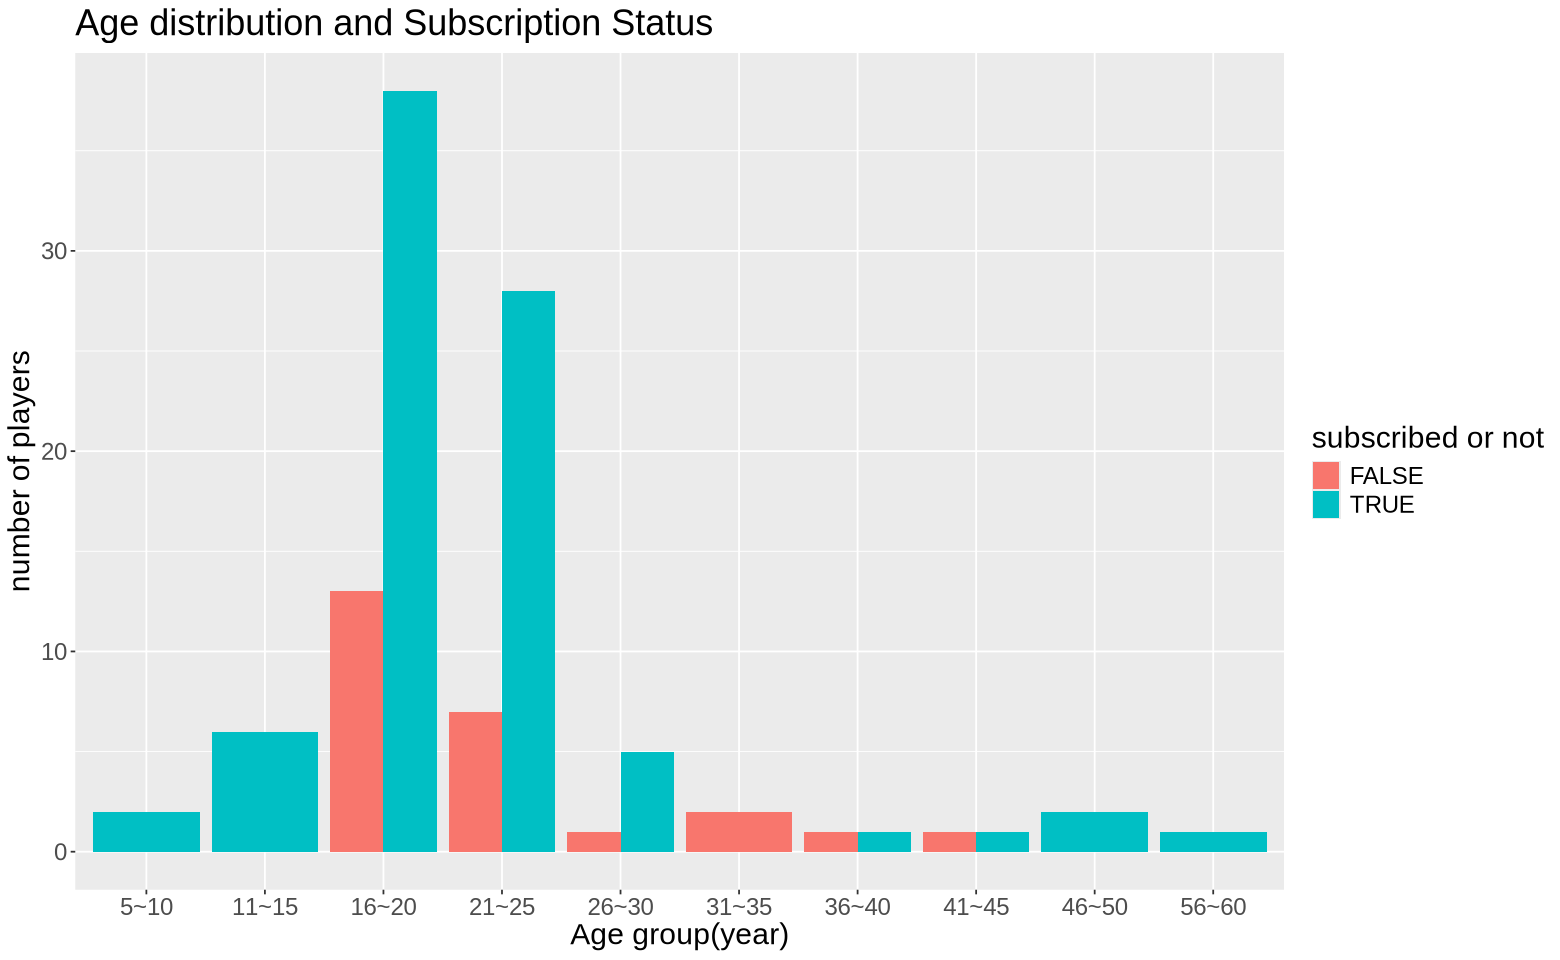

In [6]:
players_age <- mutate(clean_players, age_group = cut(Age, breaks= c(5,10,15,20,25,30,35,40,45,50,55,60), 
        labels = c("5~10", "11~15", "16~20", "21~25", "26~30", "31~35", "36~40", "41~45", "46~50", "51~55", "56~60")))

options(repr.plot.height = 8, repr.plot.width = 13)

age_distribution <- players_age |>
ggplot(aes(x = age_group, fill = subscribe)) +
geom_bar(position = "dodge") +
labs(x = "Age group(year)", y = "number of players", fill = "subscribed or not", 
     title = "Age distribution and Subscription Status ") +
theme(text= element_text(size=18))
age_distribution

**We can observe that the majority of participants are concentrated in the 16 to 25 age group, while those under 16 and over 45 show a pattern of consistently subscribing to the newsletter**

**2. We also examined subscription patterns when considering both gaming duration and age simultaneously.**

**Figure 2.**

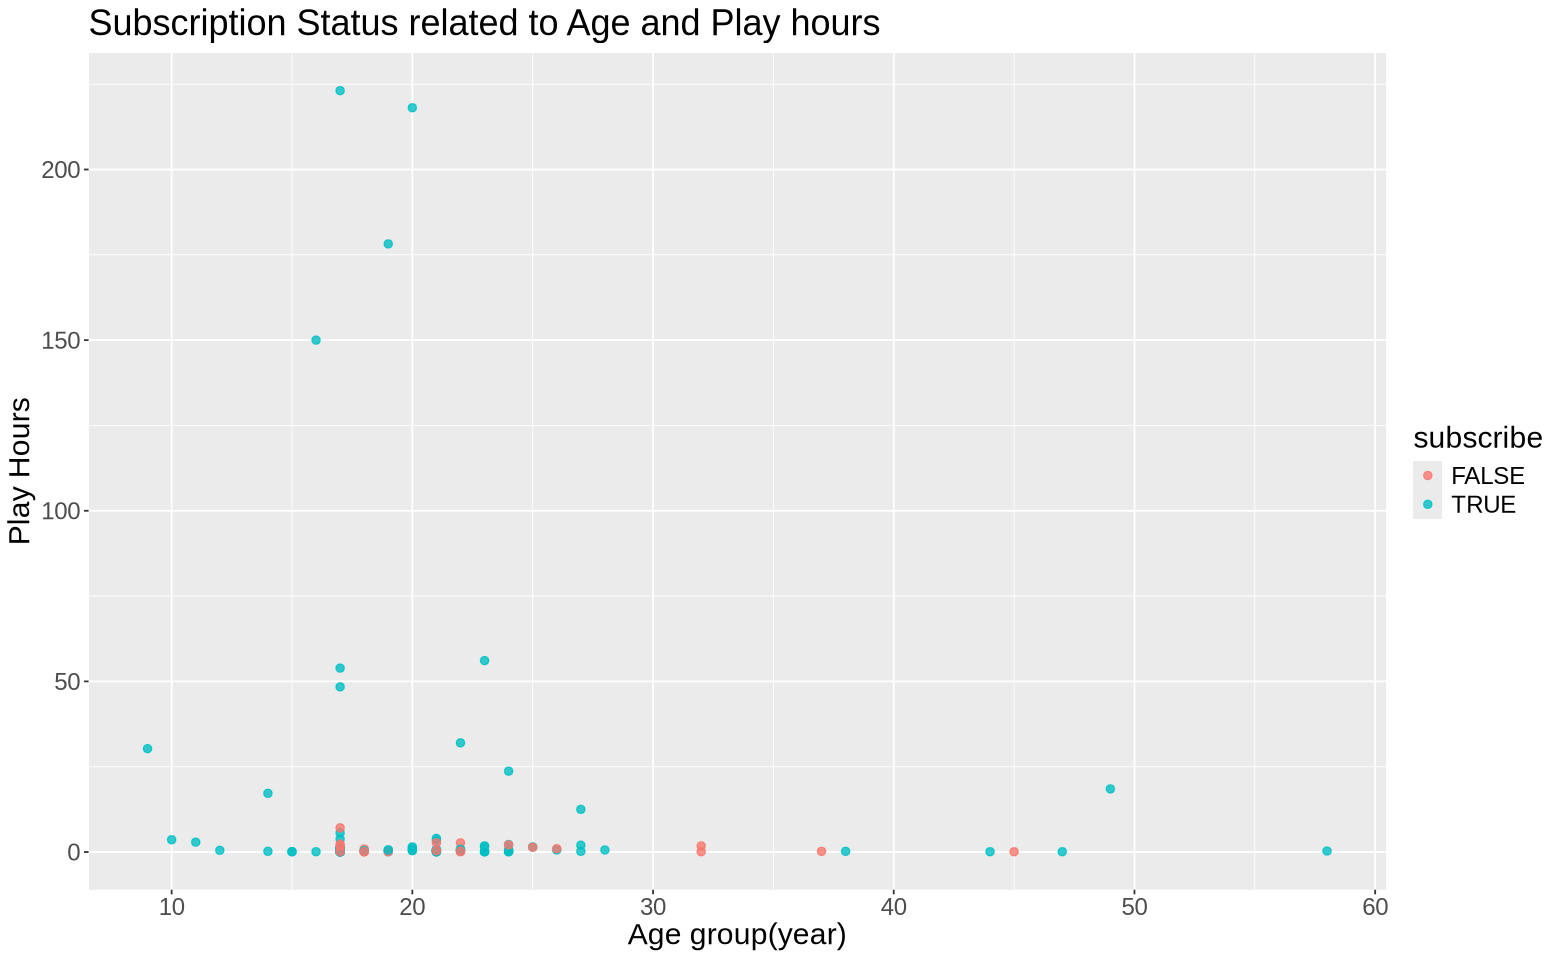

In [12]:
play_hours_distribution <- clean_players |>
ggplot(aes(x = Age, y = played_hours, colour = subscribe)) +
  geom_point(alpha = 0.8, size = 2) +
  labs(x = "Age group(year)", y = "Play Hours", fill = "subscribed or not", 
       title = "Subscription Status related to Age and Play hours") +
theme(text= element_text(size=18))
play_hours_distribution

**Given our visualization above, we can observe that all players with high playtime have subscribed, while those without subscriptions are concentrated in the under 10-hour range. From this, we can also tell that the majority of players have a low playtime**

### **Predictive Analysis**

In order to answer our question, we must use a method that allows us to predict whether or not a given player will subscribe to the dataset based on their hours played and age.

The chosen method that we used was the K-nearest neighbors classification algorithm. This classifier is used to generally find the K "nearest" or "most similar" observaton in our training set, and then using their diagnoses to create a predicioton for the new observations diagnosis(). 

When considering the use of the model, we were sure to scale the variables involved. Since the classifier predicts classes by identifying observations nearest to it, any variables with a large scale will have a much larger effect than variables with a small scale. However, this is not the case. Within our... 

Sources: 
https://datasciencebook.ca/classification1.html#classification-with-k-nearest-neighbors 